In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

In [3]:
df.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

In [52]:
# What is the number of observations in the dataset?

len(df)

4622

In [78]:
# What is the number of columns in the dataset?
df.shape[1]

7

In [100]:
# Which was the most-ordered item and how many times it was ordered?
large = df.groupby('item_name',as_index = False)['quantity'].count()
large.sort_values('quantity', ascending = False).head(1)

item_name  quantity
17  Chicken Bowl       726

In [124]:
# How many different items are sold?
len(large)

50

In [127]:
# How many items were orderd in total?
df['quantity'].sum()

4972

In [131]:
# Turn the item price into a float
df['item_price_float'] = df['item_price'].apply(lambda x: float(x[1:]))
df.head()

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  \
0                                                NaN     $2.39    
1                                       [Clementine]     $3.39    
2                                            [Apple]     $3.39    
3                                                NaN     $2.39    
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98    

   item_price_float  order_price  
0              2.39         2.39  
1              3.39         3.39  
2              3.39         3.39  
3              2.39         2.39  
4             16.98        33.96

In [157]:
# What is the price of each item?
df.groupby('item_name')['item_price_float'].mean()

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

In [159]:
# How much was the revenue for the period in the dataset?
(df['quantity'] * df['item_price_float']).sum()

39237.02

In [162]:
# How many orders were made in the period?
len(df['order_id'].value_counts())

1834

In [164]:
# What is the average revenue amount per order?
df['order_price'] = df['quantity'] * df['item_price_float']
order_price = pd.DataFrame(df.groupby('order_id')['order_price'].sum())
order_price.mean(0)

order_price    21.394231
dtype: float64

In [169]:
# Merge the table dfa that contains order date and order id with df and plot daily revenue
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start = "20170101", end = "20170201"), size = 1800),
                   "order_id": np.arange(1800)})
result = pd.merge(dfa, df, on = 'order_id')
result = pd.merge(result, order_price, on = 'order_id' )
result

date  order_id  quantity                              item_name  \
0    2017-01-14         1         1           Chips and Fresh Tomato Salsa   
1    2017-01-14         1         1                                   Izze   
2    2017-01-14         1         1                       Nantucket Nectar   
3    2017-01-14         1         1  Chips and Tomatillo-Green Chili Salsa   
4    2017-01-20         2         2                           Chicken Bowl   
5    2017-01-16         3         1                           Chicken Bowl   
6    2017-01-16         3         1                          Side of Chips   
7    2017-01-24         4         1                          Steak Burrito   
8    2017-01-24         4         1                       Steak Soft Tacos   
9    2017-01-23         5         1                          Steak Burrito   
10   2017-01-23         5         1                    Chips and Guacamole   
11   2017-01-14         6         1                   Chicken Crispy Tacos   
12   2017-01-14         6         1                     Chicken Soft Tacos   
13   2017-01-09         7         1                           Chicken Bowl   
14   2017-01-09         7         1                    Chips and Guacamole   
15   2017-01-21         8         1  Chips and Tomatillo-Green Chili Salsa   
16   2017-01-21         8         1                        Chicken Burrito   
17   2017-01-06         9         1                        Chicken Burrito   
18   2017-01-06         9         2                            Canned Soda   
19   2017-01-18        10         1                           Chicken Bowl   
20   2017-01-18        10         1                    Chips and Guacamole   
21   2017-01-12        11         1                       Barbacoa Burrito   
22   2017-01-12        11         1                       Nantucket Nectar   
23   2017-01-24        12         1                        Chicken Burrito   
24   2017-01-24        12         1                                   Izze   
25   2017-01-29        13         1           Chips and Fresh Tomato Salsa   
26   2017-01-29        13         1                           Chicken Bowl   
27   2017-01-21        14         1                       Carnitas Burrito   
28   2017-01-21        14         1                            Canned Soda   
29   2017-02-01        15         1                        Chicken Burrito   
...         ...       ...       ...                                    ...   
4497 2017-01-09      1788         1                                  Chips   
4498 2017-01-09      1789         1                           Chicken Bowl   
4499 2017-01-09      1789         2                      Canned Soft Drink   
4500 2017-01-09      1789         1                          Carnitas Bowl   
4501 2017-01-22      1790         1                      Canned Soft Drink   
4502 2017-01-22      1790         1                     Chicken Soft Tacos   
4503 2017-01-22      1790         1           Chips and Fresh Tomato Salsa   
4504 2017-01-17      1791         1                          Carnitas Bowl   
4505 2017-01-17      1791         1                                  Chips   
4506 2017-01-02      1792         1                           Chicken Bowl   
4507 2017-01-02      1792         1                          Bottled Water   
4508 2017-01-23      1793         1                          Steak Burrito   
4509 2017-01-23      1793         1                                  Chips   
4510 2017-01-23      1793         1                          Barbacoa Bowl   
4511 2017-02-01      1794         1                           Chicken Bowl   
4512 2017-02-01      1794         1                    Chips and Guacamole   
4513 2017-02-01      1794         1                      Canned Soft Drink   
4514 2017-01-29      1795         1                     Chicken Soft Tacos   
4515 2017-01-29      1795         1                    Chips and Guacamole   
4516 2017-01-29      1795        

In [195]:

daily_sum = result.groupby('date')['item_price_float'].sum()
daily_sum


date
2017-01-01     899.23
2017-01-02    1242.03
2017-01-03    1255.36
2017-01-04     960.82
2017-01-05     939.81
2017-01-06    1159.52
2017-01-07    1024.05
2017-01-08    1002.13
2017-01-09    1108.73
2017-01-10    1052.41
2017-01-11    1595.35
2017-01-12    1191.39
2017-01-13     950.61
2017-01-14    1067.79
2017-01-15    1040.08
2017-01-16     754.47
2017-01-17    1087.17
2017-01-18     971.51
2017-01-19     986.38
2017-01-20    1051.43
2017-01-21    1251.39
2017-01-22     921.79
2017-01-23     778.36
2017-01-24    1333.32
2017-01-25     963.82
2017-01-26    1076.35
2017-01-27     996.43
2017-01-28    1148.73
2017-01-29     768.14
2017-01-30    1038.41
2017-01-31    1278.31
2017-02-01     917.78
Name: item_price_float, dtype: float64

Text(0, 0.5, 'Daily revenue')

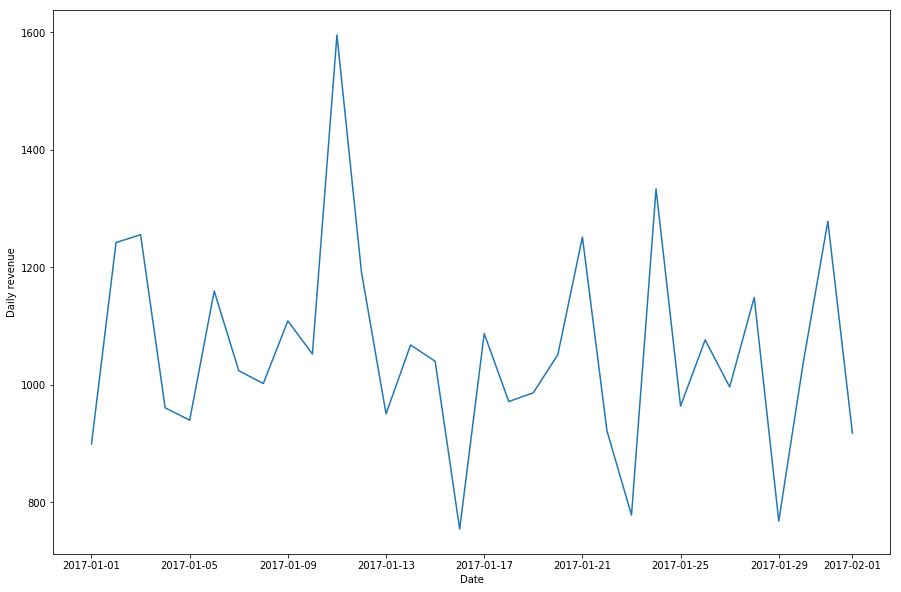

In [196]:
plt.figure(figsize = (15,10))
plt.plot(daily_sum)
plt.xlabel('Date')
plt.ylabel('Daily revenue')

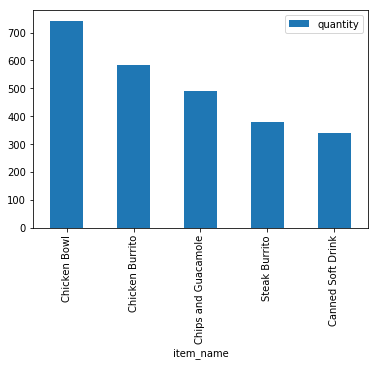

In [181]:
# Create a histogram of the top 5 items bought
item_quantity = pd.DataFrame(result.groupby('item_name', as_index = False)['quantity'].sum())
top =  pd.DataFrame(item_quantity.sort_values(by = ['quantity'], ascending = [False]).head(5))
top.plot.bar(x = 'item_name')

In [185]:
# Sort the dataset by the name of the item
result.sort_values(by=['item_name'])

date  order_id  quantity            item_name  \
1051 2017-01-23       432         1    6 Pack Soft Drink   
1976 2017-01-10       798         1    6 Pack Soft Drink   
1026 2017-01-31       422         1    6 Pack Soft Drink   
639  2017-01-07       264         1    6 Pack Soft Drink   
4363 2017-01-24      1742         1    6 Pack Soft Drink   
4359 2017-01-14      1741         1    6 Pack Soft Drink   
2108 2017-01-17       849         1    6 Pack Soft Drink   
3141 2017-01-27      1253         1    6 Pack Soft Drink   
298  2017-01-18       129         1    6 Pack Soft Drink   
2232 2017-01-22       899         1    6 Pack Soft Drink   
743  2017-01-10       306         1    6 Pack Soft Drink   
3132 2017-01-14      1248         1    6 Pack Soft Drink   
3010 2017-01-02      1196         1    6 Pack Soft Drink   
1260 2017-01-31       511         1    6 Pack Soft Drink   
341  2017-01-28       148         1    6 Pack Soft Drink   
879  2017-01-20       363         1    6 Pack Soft Drink   
2374 2017-01-19       945         1    6 Pack Soft Drink   
2389 2017-01-24       949         1    6 Pack Soft Drink   
1279 2017-01-08       520         1    6 Pack Soft Drink   
2860 2017-02-01      1136         1    6 Pack Soft Drink   
1392 2017-01-16       566         1    6 Pack Soft Drink   
357  2017-01-03       154         1    6 Pack Soft Drink   
417  2017-01-16       182         1    6 Pack Soft Drink   
2793 2017-01-28      1109         1    6 Pack Soft Drink   
721  2017-01-25       298         1    6 Pack Soft Drink   
2713 2017-01-14      1076         1    6 Pack Soft Drink   
4174 2017-01-18      1666         1    6 Pack Soft Drink   
388  2017-01-28       168         1    6 Pack Soft Drink   
1937 2017-01-26       784         1    6 Pack Soft Drink   
1922 2017-01-21       776         1    6 Pack Soft Drink   
...         ...       ...       ...                  ...   
1653 2017-01-16       668         1  Veggie Crispy Tacos   
4084 2017-01-20      1635         1         Veggie Salad   
2996 2017-01-06      1192         1         Veggie Salad   
3471 2017-01-04      1395         1         Veggie Salad   
3163 2017-01-03      1263         1         Veggie Salad   
1694 2017-01-29       686         1         Veggie Salad   
2756 2017-01-15      1094         1         Veggie Salad   
1316 2017-01-05       536         1    Veggie Salad Bowl   
455  2017-01-21       195         1    Veggie Salad Bowl   
4109 2017-01-07      1646         1    Veggie Salad Bowl   
186  2017-01-20        83         1    Veggie Salad Bowl   
4201 2017-01-31      1677         1    Veggie Salad Bowl   
4261 2017-01-04      1700         1    Veggie Salad Bowl   
3223 2017-01-04      1289         1    Veggie Salad Bowl   
1884 2017-01-27       760         1    Veggie Salad Bowl   
2683 2017-01-06      1066         1    Veggie Salad Bowl   
2269 2017-02-01       913         1    Veggie Salad Bowl   
496  2017-01-19       207         1    Veggie Salad Bowl   
295  2017-01-22       128         1    Veggie Salad Bowl   
3293 2017-01-27      1321         1    Veggie Salad Bowl   
2156 2017-01-02       869         1    Veggie Salad Bowl   
2223 2017-01-01       896         1    Veggie Salad Bowl   
960  2017-01-19       394         1    Veggie Salad Bowl   
2384 2017-01-03       948         1    Veggie Soft Tacos   
738  2017-02-01       304         1    Veggie Soft Tacos   
1699 2017-01-19       688         1    Veggie Soft Tacos   
781  2017-01-17       322         1    Veggie Soft Tacos   
3889 2017-01-20      1559         2    Veggie Soft Tacos   
1395 2017-01-02       567         1    Veggie Soft Tacos   
2851 2017-01-22      1132         1    Veggie Soft Tacos   

                                     choice_description item_price  \
1051                                             [Coke]     $6.49    
1976                                        [Diet Coke]     $6.49    
1026                                           [Sprite]     $6.49    
639       

In [188]:
# How many times were a Veggie Salad Bowl ordered?
len(df[df['item_name'] == 'Veggie Salad Bowl'])

18

In [190]:
# How many times people orderd more than one Canned Soda?
CS = df[df['item_name'] == 'Canned Soda']
len(CS[CS['quantity'] > 1])

20

Text(0, 0.5, 'Items in order')

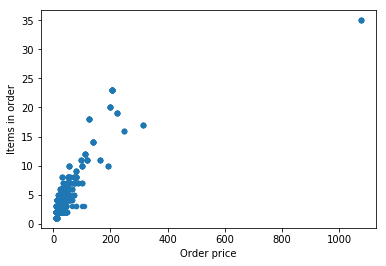

In [192]:
# Create a scatterplot with the number of items orderered per order price
item_quantity_in_order = pd.DataFrame(result.groupby('order_id')['quantity'].sum())
scaterplot = pd.merge(result,item_quantity_in_order, on = 'order_id')
scatterplot = scatter.rename(columns = {"order_price_x": "price_for_quantity", "order_price_y": "order_price","quantity_x": "quantity", "quantity_y": "quantity_in_order"})
scatterplot.sort_values(by = ['order_price'],  ascending = [False])
scatterplot.plot.scatter(y = 'quantity_in_order', x = 'order_price')
plt.xlabel('Order price')
plt.ylabel('Items in order')